### Histogram and Scatter plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    ##########################################################
    df_data.fillna(method ='ffill', inplace= True)
    df_data.fillna(method ='bfill', inplace= True)
    ##########################################################

def symbol_to_path(symbol, base_dir="../data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    # Read Data
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp= pd.read_csv(symbol_to_path(symbol), index_col= "Date", parse_dates= True, usecols=['Date', 'Adj Close'], na_values=['nan'])
       
        #rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
       
        df=df.join(df_temp) #use default left
        
        if symbol == 'SPY':
            df = df.dropna(subset=["SPY"])
            
    
    return df

def normalize_data(df):
    """Normalize stock prices using the first row of the dataframe"""
    return (df/df.iloc[0])

def plot_data(df, title="Stock prices", xlabel="Date" , ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    plot_data(df.loc[start_index:end_index,columns], title = "Selected Data")
    
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    #return pd.rolling_mean(values, window=window)
    return values.rolling(window).mean()

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return values.rolling(window).std()

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band , lower_band

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    
    daily_returns = df.copy() #copy the given Dataframe to match size and column names
    #compute daily returns  for row 1 onwards 
    daily_returns = (df/df.shift(1)) -1 #daily_returns[1:] = (df[1:]/df[:-1].values) -1
    daily_returns.iloc[0, :] =0 # set daily returns for row 0 to zero
    
    return daily_returns

def compute_cumulative_returns(df):
    """Compute and return the cumulative return values."""
    
    cumulative_returns = df.copy() #copy the given Dataframe to match size and column names
    #compute cumulative returns  for row 1 onwards 
    cumulative_returns = (df/df.iloc[0]) -1 
       
    return cumulative_returns

    
    

In [3]:
def test_run():
    # Define a date range
    dates = pd.date_range('2009-01-01','2012-12-31') # the year 2010
    #print (dates)
    print('******************')
            
    #Read in more stocks 
    symbols = ['SPY','XOM','GOOG', 'IBM', 'GLD']
    
    #Create an empty dataframe
    #df1= pd.DataFrame(index=dates)
    #print(df1)
    #print('******************')
    
    #Read SPY data into temporary dataframe
    #dfSPY = pd.read_csv("../data/SPY.csv", index_col= "Date", parse_dates= True, usecols=['Date', 'Adj Close'], na_values=['nan']) # date need to be set as index because to Join.
    
    #print(dfSPY.tail(10))
    #print('******************')
    
    #Join the two dataframes using DataFrame.join()
    #df1= df1.join(dfSPY, how= 'inner')
    #print(df1)
    #print('******************')
    
    #for symbol in symbols:
    #    df_temp= pd.read_csv("../data/{}.csv".format(symbol), index_col= "Date", parse_dates= True, usecols=['Date', 'Adj Close'], na_values=['nan'])
    #   
    #    #rename to prevent clash
    #    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    #    df1=df1.join(df_temp) #use default left
    
    # Get stock data
    df = get_data(symbols, dates)
        
    # Slice and plot
    
    # Slice by row range (dates) using DataFrame selector
    #print (df['2010-01-01':'2010-01-31']) # the month of January
    #print('******************')
    
    #Slice by column (symbols)
    #print(df['GOOG']) #a single label selects a single column
    #print('******************')
    
    #print(df[['IBM', 'GLD']]) # a list of labels selects multiple columns      
    #print('******************')       
    
    #Slice by row and column 
    #print (df.loc['2010-03-10':'2010-03-15',['SPY','IBM']])
    
    #print('*********Selected Plot***********')
    #df= plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')
       
    # Normalize
    #print('*********Before Normalization***********')
    #plot_data(df)
    #print('*********After Normalization***********')
    #plot_data(normalize_data(df))
    
    #Compute global statistics for each stock
    #print('*********Mean***********')
    #print (df.mean())
    #print('*********Median***********')
    #print (df.median())
    #print('*********Standard Deviation***********')
    #print (df.std())
    
    # Compute Bollinger Bands
    # 1. Compute rolling mean
    #rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    #rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    #upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY data +rollingmean + Bollinger Bands, retain matplotlib axis object
    #ax = df['SPY'].plot(title ="Bollinger Bands", label = 'SPY')
    
    # Add rolling mean to same plot    
    #rm_SPY.plot(label= 'Rolling mean', ax=ax)
    #upper_band.plot(label= 'upper band', ax=ax)
    #lower_band.plot(label= 'lower band', ax=ax)
    
    # Add axis labels and legend
    #ax.set_xlabel("Date")
    #ax.set_ylabel("Price")
    #ax.legend(loc='upper left')
    #plt.show()
    
    # Compute cumulative returns
    cumulative_returns = compute_cumulative_returns(df[['SPY', 'XOM']])
    plot_data(cumulative_returns, title="Cumulative returns", ylabel="Cumulative returns")
    plt.show()
    
    # Compute daily returns
    #plot_data(df[['SPY']])
    daily_returns = compute_daily_returns(df[['SPY', 'XOM', 'GLD']])
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    #scatterplot SPY vs XOM
    daily_returns.plot(kind='scatter', x='SPY', y= 'XOM')
    beta_XOM, alpha_XOM= np.polyfit(daily_returns['SPY'], daily_returns['XOM'],1)
    plt.plot(daily_returns['SPY'],beta_XOM*daily_returns['SPY'] + alpha_XOM,'-',color='r')
    plt.show()
    
    #scatterplot SPY vs GLD
    daily_returns.plot(kind='scatter', x='SPY', y= 'GLD')
    beta_GLD, alpha_GLD= np.polyfit(daily_returns['SPY'], daily_returns['GLD'],1)
    plt.plot(daily_returns['SPY'],beta_XOM*daily_returns['SPY'] + alpha_GLD,'-',color='r')
    plt.show()
    
    #calculate correlation coefficient
    print (daily_returns.corr(method='pearson'))
    
    
    # Plot a histogram
    daily_returns['SPY'].hist(bins=20,label="SPY") # chaning no of bins to 20
    daily_returns['XOM'].hist(bins=20,label="XOM")
    plt.legend(loc='upper right')
    
    #Get mean and standard deviation
    mean = daily_returns['SPY'].mean()
    print ("mean=",mean)
    std = daily_returns['SPY'].std()
    print ("std=",std)
    
    plt.axvline(mean,color='w', linestyle='dashed', linewidth=2)
    plt.axvline(std,color='r', linestyle='dashed', linewidth=2)
    plt.axvline(-std,color='r', linestyle='dashed', linewidth=2)
    plt.show()
    
    print (daily_returns.kurtosis())

******************


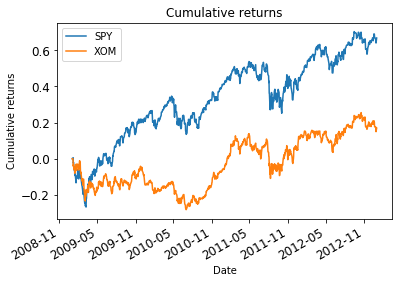

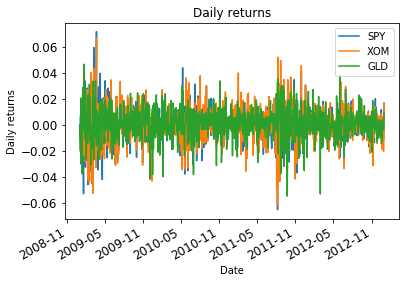

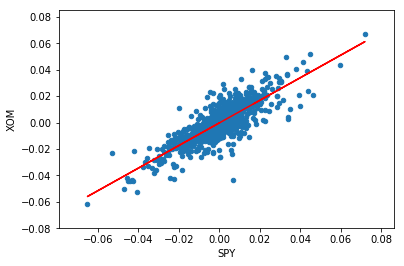

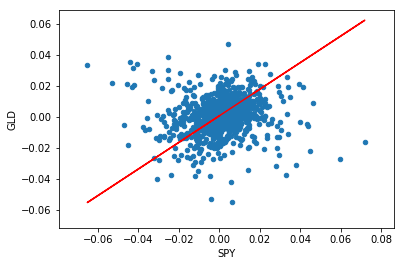

          SPY       XOM       GLD
SPY  1.000000  0.821369  0.076348
XOM  0.821369  1.000000  0.080527
GLD  0.076348  0.080527  1.000000
mean= 0.00059356874451
std= 0.0130325825239


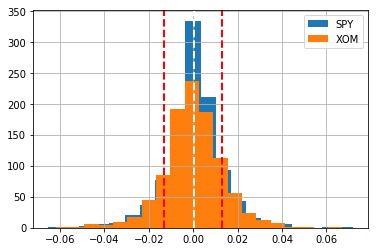

SPY    3.408609
XOM    2.253419
GLD    1.943549
dtype: float64


In [4]:
test_run()